# Employee Data Analysis Project:

### Main Objective of project is to find out the reasons why employees left the company and how it affects the company productivity.

Firstly, have to get csv file in jupyter notebook with the help of pandas library and also have to use numpy, seaborn, matplotlib modules for our analysis of data.

In [1]:
#import required modules
import numpy as np # for 1-D array
import pandas as pd # for data frames
import seaborn as sns # for plotiing graphs
import matplotlib.pyplot as plt # for plotiing graphs
import os
%matplotlib inline

In [2]:
#give path to access the data from system
os.chdir('C:/Users/Vishal/Downloads/')

In [3]:
# read the csv data file
Employee = pd.read_csv('employee_data.csv')

In [4]:
# show the data
Employee.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [5]:
# no of rows and colunms in data
Employee.shape

(14249, 10)

In [6]:
# getting information about data according to cols
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


# Cleaning of data:

In [7]:
# remove duplicate values from data
Employee = Employee.drop_duplicates().reset_index(drop=True)

In [8]:
# check shape of data after removing duplicates
Employee.shape

(14221, 10)

In [9]:
# check the null values in data
Employee.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12165
last_evaluation       1504
n_projects               0
recently_promoted    13921
salary                   0
satisfaction           153
status                   0
tenure                 153
dtype: int64

In [10]:
Employee['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
admin                      176
procurement                174
temp                       153
Name: department, dtype: int64

Above we can see that null values in satisfaction and tenure is 153 and value count for 'temp' department is 153. So decided to remove temp department from our data set.

In [11]:
# remove temperory department as many data relating with that not given(that is satisfaction, tenure)
temp=[]
for i in range(14221):
    if Employee['department'][i] == 'temp':
        temp.append(i)
len(temp)

153

In [12]:
# drop temp dept from data
Employee.drop(temp,inplace=True)

After removing 'temp' department we get data with rows=14068 and cols.= 10. I used this data for further analysis.

In [13]:
# check shape of data after removing the temperory department
Employee.shape

(14068, 10)

We can see values given in 'recently_promoted' and 'filed_complaint' are float type. We have to convert this into 'promoted' and 'complaint' respectively, because there are only two possibilities in this columns.(that is "promoted" "not promoted" and "complaint" "not complaint") We will replace null values as "not promoted" and "not complaint" in respective columns.


In [14]:
# Get all about data
Employee.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,14068.000000,13359,2025.0,12717.000000,14068.000000,300.0,14068,14068.000000,14068,14068.000000
unique,NaN,11,NaN,NaN,NaN,NaN,3,NaN,2,NaN
top,NaN,sales,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN
freq,NaN,3923,NaN,NaN,NaN,NaN,6871,NaN,10701,NaN
mean,201.083736,NaN,1.0,0.718477,3.801038,1.0,NaN,0.621295,NaN,3.497228
std,49.959962,NaN,0.0,0.173062,1.236058,0.0,NaN,0.250469,NaN,1.460917
min,96.000000,NaN,1.0,0.316175,2.000000,1.0,NaN,0.040058,NaN,2.000000
25%,156.000000,NaN,1.0,0.563866,3.000000,1.0,NaN,0.450390,NaN,3.000000
50%,200.000000,NaN,1.0,0.724939,4.000000,1.0,NaN,0.652527,NaN,3.000000
75%,245.000000,NaN,1.0,0.871358,5.000000,1.0,NaN,0.824951,NaN,4.000000


In [39]:
# check for variables in promoted col
Employee['recently_promoted'].value_counts()

1.0    300
Name: recently_promoted, dtype: int64

If we take value_counts department wise we get 2 departments as IT and information_technology both are same we have merged this two departments in one by replacing one name with other.

In [40]:
# check the unique names of departments
Employee['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
admin                      176
procurement                174
Name: department, dtype: int64

In [41]:
# check for variables in filed complaint col
Employee['filed_complaint'].value_counts()

1.0    2025
Name: filed_complaint, dtype: int64

In [42]:
# replace values into str from float in recently_promoted and filed_complaint cols
Employee['recently_promoted'].replace({float(1.0):'Promoted'},inplace=True) # replace float to str as only 2 parameters
Employee['department'].replace({'information_technology' : 'IT'},inplace=True) # make one IT dept from two
Employee['filed_complaint'].replace({float(1.0):'complaint'},inplace=True) # replace float to str as only 2 parametersa

Filled filled null values as said earlier for filed_complaint and last_evalution column. for department column filled with "Unknown department" and for last_evalution filled with mean value because 50% data having the mean value.

In [43]:
# fill nan values for cols
Employee['department'].fillna('Unknown',inplace=True)
Employee['filed_complaint'].fillna('no complaint',inplace=True)
Employee['last_evaluation'].fillna(Employee['last_evaluation'].mean(),inplace=True)
Employee['recently_promoted'].fillna("not promoted",inplace=True)

In [44]:
# data after cleaning
Employee.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,no complaint,0.932868,4,not promoted,low,0.829896,Left,5.0
1,232,support,no complaint,0.718477,3,not promoted,low,0.834544,Employed,2.0
2,184,sales,no complaint,0.788830,3,not promoted,medium,0.834988,Employed,3.0
3,206,sales,no complaint,0.575688,4,not promoted,low,0.424764,Employed,2.0
4,249,sales,no complaint,0.845217,3,not promoted,low,0.779043,Employed,3.0


In [45]:
# check unique values for cols
Employee.nunique()

avg_monthly_hrs        215
department              11
filed_complaint          2
last_evaluation      12360
n_projects               6
recently_promoted        2
salary                   3
satisfaction         13710
status                   2
tenure                   8
dtype: int64

In [46]:
# check null values for cols
Employee.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

# about  data department-wise:

In [48]:
# group by data by department col
Dept_sum = Employee.groupby('department').count()
Dept_sum

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
department,,,,,,,,,
IT,1370,1370,1370,1370,1370,1370,1370,1370,1370
Unknown,709,709,709,709,709,709,709,709,709
admin,176,176,176,176,176,176,176,176,176
engineering,2592,2592,2592,2592,2592,2592,2592,2592,2592
finance,728,728,728,728,728,728,728,728,728
management,595,595,595,595,595,595,595,595,595
marketing,819,819,819,819,819,819,819,819,819
procurement,174,174,174,174,174,174,174,174,174
product,860,860,860,860,860,860,860,860,860


Department------Count
sales          3923
engineering    2592
support        2122
IT             1370
product         860
marketing       819
finance         728
Unknown         709
management      595
admin           176
procurement     174
Name: department, dtype: int64


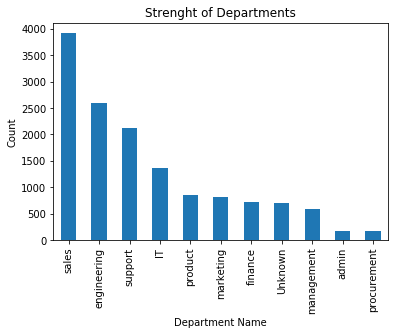

In [50]:
# show the strenght of each department
Employee_dept = Employee['department'].value_counts()
print('Department''------''Count')
print(Employee_dept)
Employee_dept.plot.bar()
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.title('Strenght of Departments')
plt.show()

Sales, Engineering, Support, IT are main key departments in company and have to focus more on this departments.

# Why employees are leaving company and how affects company ?

In [28]:
# group by data by status
left = Employee.groupby('status')
left.mean()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure
status,,,,,
Employed,199.142230,0.714896,3.786282,0.675979,3.380245
Left,207.254232,0.729856,3.847936,0.447500,3.869023


Status-------Count
Employed    10701
Left         3367
Name: status, dtype: int64


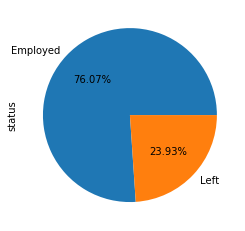

In [85]:
# value count for status of employees
status = Employee['status'].value_counts()
print('Status''-------''Count')
print(status)
status.plot.pie(autopct='%.2f%%')
plt.show()

Number of employees left the company are 23.93% of total employees.

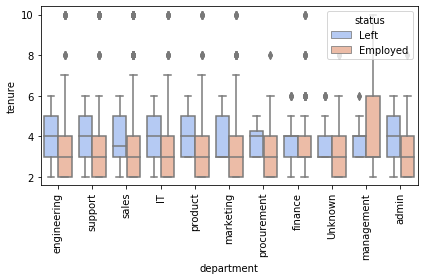

In [55]:
# Compare tenure of employee with repect to department and status of employee
dept_box=sns.boxplot(x="department", y="tenure", hue="status",data=Employee, palette="coolwarm")
plt.setp(dept_box.get_xticklabels(), rotation=90)
plt.tight_layout()

Average tenure of employees who left is more than employeed employees. But in some dept outliers are there for employeed employees that means those are high salary employees. only in management dept tenure of employed employees is more.

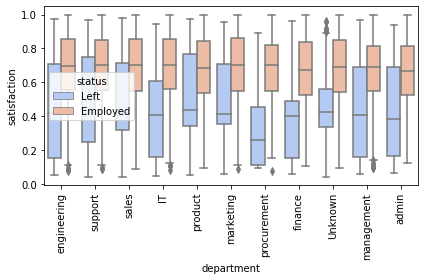

In [36]:
# satisfaction of employees according to department and status of employee
dept_box=sns.boxplot(x="department", y="satisfaction", hue="status",data=Employee, palette="coolwarm")
plt.setp(dept_box.get_xticklabels(), rotation=90)
plt.tight_layout()

Satisfaction of employed employees is more than left employees, so that satisfaction is one of the reason of employees to left the company. If you see there are outliers for employed employees, which show that their are some emlpoyees are still unsatisfied. thier satisfaction is below 0.2.

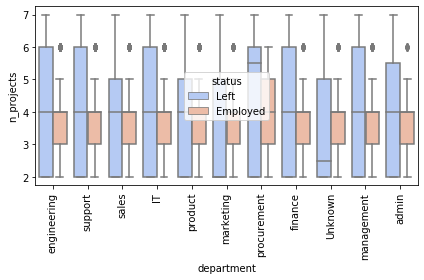

In [38]:
# Number of projects done by each department w r t status of employee
dept_box1=sns.boxplot(x="department", y="n_projects", hue="status",data=Employee, palette="coolwarm")
plt.setp(dept_box1.get_xticklabels(), rotation=90)
plt.tight_layout()

Number of projects done by left employees is more than employed employees. there are some employed employees who have completed 6 projects which is outlier for others.

Salary-----Count
low       6871
medium    6055
high      1142
Name: salary, dtype: int64


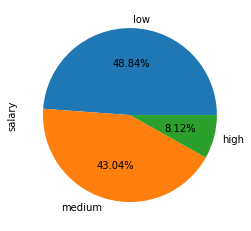

In [81]:
# Salary distribution for employees 
Salary = Employee['salary'].value_counts()
print('Salary''-----''Count')
print(Salary)
Salary.plot.pie(autopct = '%.2f%%')
plt.show()

Maximum number of employees are having low and medium salary. there are 91.88% employees whose salary is low and medium.

Type----------Values
not promoted    13768
Promoted          300
Name: recently_promoted, dtype: int64


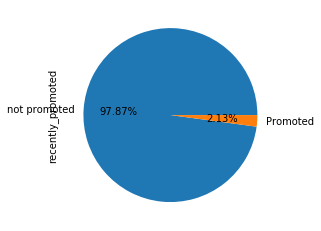

In [80]:
# Value count and distribution for promotion
Promotion = Employee['recently_promoted'].value_counts()
print('Type''----------''Values')
print(Promotion)
Promotion.plot.pie(autopct = '%.2f%%')
plt.show()

There are only 2.13% employees who are promoted recently, so promotion is also factor for employees to leave the company.

Complaints------Counts
no complaint    12043
complaint        2025
Name: filed_complaint, dtype: int64


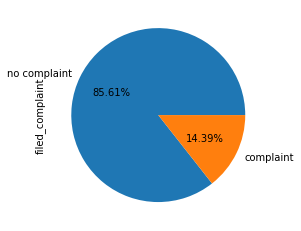

In [77]:
# value count and distribution for filed complaint
Complaints = Employee['filed_complaint'].value_counts()
print('Complaints''------''Counts')
print(Complaints)
Complaints.plot.pie(autopct = '%.2f%%')
plt.show()

There are 14.39% employees who filed complaints.

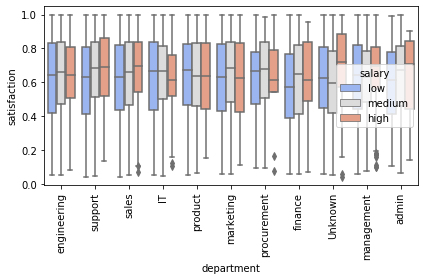

In [39]:
# department wise satisfaction of employees w.r.t salary
dept_box1=sns.boxplot(x="department", y="satisfaction", hue="salary",data=Employee, palette="coolwarm")
plt.setp(dept_box1.get_xticklabels(), rotation=90)
plt.tight_layout()

from above plot we come to know that there are some employees in sales, procurement, management, IT dept who having high salary but not satisfied(their satisfaction is below 20%).

Year-----counts
3.0     6048
2.0     3046
4.0     2400
5.0     1373
6.0      664
10.0     200
7.0      182
8.0      155
Name: tenure, dtype: int64


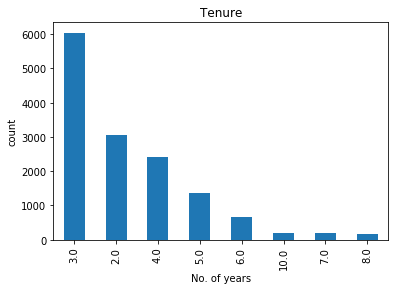

In [70]:
# value count and distribution for tenure of employees
Tenure = Employee['tenure'].value_counts()
print('Year''-----''counts')
print(Tenure)
Tenure.plot.bar()
plt.xlabel('No. of years')
plt.ylabel('count')
plt.title('Tenure')
plt.show()

Maximum tenure of employees is 2 to 5 years. 91.46% employees lies between this.

# Conclusion:

#  Reasons of employees to left the company:


1. SATISFACTION : Satisfaction of left employees is 44.75% and Employed employees is 67.66%. Total 23.93% employees left the company.
2. SALARY : There are 91.88% employees are having salary low & medium, this could lead employees to left.
3. PROMOTION : There are only 2.13% employees are promoted recently, it is also factor that have to consider in reasons.
4. COMPLAINTS : 14.39% employees have filed complaints, it may be one of the reason for employees to left the company.

# On company:

1. PRODUCTIVITY : As Tenure of left employess is more than employeed employees it will afffect the production of company. Also the number of projects done by left is more than employed.
2. TENURE : As maximum employees lies between 2 to 5 years tenure (91.46%), so there is absence of more mature employees in company.
3. SALARY : There are some employees who having high salary but not satisfied.

# Thank you